<a href="https://colab.research.google.com/github/olusegunajibola/WQU/blob/main/Copy_of_GWP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### From the previous assignment, re-import the data from the csv file

In [ ]:
pip install arch

     |████████████████████████████████| 902 kB 8.4 MB/s 
     |████████████████████████████████| 9.8 MB 34.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls
print()
import os
os.chdir('/content/gdrive/MyDrive/Colab Files/WQU_MLiF/GWP_2_MLiF')
!ls


Mounted at /content/gdrive
gdrive	sample_data

'Copy of GWP2.ipynb'
'Copy of MScFE 650 MLF GWP Data.csv'
 GWP2.ipynb
'MScFE 650 MLF GWP 2 - Clustering, CART and SVM.xlsx'
 MScFE650_Sub2_v1.0.ipynb
'References by Olusegun GWP2_MLiF.gdoc'


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import random
import math
import arch
from arch.univariate import arch_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from  matplotlib.colors import LinearSegmentedColormap
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.facecolor'] = "0.92"

In [ ]:
dataset = pd.read_csv(r"Copy of MScFE 650 MLF GWP Data.csv",  index_col = "Date" )
# dataset = pd.read_csv("MScFE 650 MLF GWP Data.csv", index_col = "Date")
dataset.head()

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
01-Jan-16,1390.716,2376.29,3525.9150,1068.79,106.70,105.38,1036.23,1663.27,59.47,8566.71,...,2373.17,811.96,404.73,1507.8101,1255.75,108.40,11136.65,1148.37,1818.40,1949.70
08-Jan-16,1291.267,2260.85,3280.6683,1005.56,97.66,99.35,952.01,1586.18,54.63,8183.00,...,2209.38,751.09,388.05,1437.6600,1177.76,101.00,10389.93,1075.30,1722.00,1831.88
15-Jan-16,1257.086,2217.50,3118.2981,985.38,93.54,97.32,904.64,1541.08,51.54,7755.73,...,2095.60,720.23,344.45,1372.9800,1133.72,97.34,10042.32,1056.01,1692.43,1789.56
22-Jan-16,1254.167,2281.98,2935.0677,985.87,95.79,100.73,879.17,1582.10,51.15,8035.69,...,2173.55,745.96,367.44,1350.0500,1160.48,99.21,10469.07,1076.48,1719.61,1814.12
29-Jan-16,1298.240,2462.19,3134.0840,1005.56,96.93,103.05,958.97,1638.84,52.13,8211.17,...,2214.88,825.18,400.93,1375.1000,1239.58,100.06,10432.42,1087.17,1774.40,1843.88


### Summarize the levels of the series, using 3 methods

In [ ]:
# help(dataset.pct_change)

In [ ]:
daily_return = dataset.pct_change(1)
daily_return

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
01-Jan-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08-Jan-16,-0.071509,-0.048580,-0.069555,-0.059160,-0.084724,-0.057221,-0.081275,-0.046348,-0.081386,-0.044791,...,-0.069017,-0.074967,-0.041213,-0.046524,-0.062106,-0.068266,-0.067051,-0.063629,-0.053014,-0.060430
15-Jan-16,-0.026471,-0.019174,-0.049493,-0.020068,-0.042187,-0.020433,-0.049758,-0.028433,-0.056562,-0.052214,...,-0.051499,-0.041087,-0.112357,-0.044990,-0.037393,-0.036238,-0.033456,-0.017939,-0.017172,-0.023102
22-Jan-16,-0.002322,0.029078,-0.058760,0.000497,0.024054,0.035039,-0.028155,0.026618,-0.007567,0.036097,...,0.037197,0.035725,0.066744,-0.016701,0.023604,0.019211,0.042495,0.019384,0.016060,0.013724
29-Jan-16,0.035141,0.078971,0.067806,0.019972,0.011901,0.023032,0.090767,0.035864,0.019159,0.021838,...,0.019015,0.106199,0.091144,0.018555,0.068161,0.008568,-0.003501,0.009931,0.031862,0.016405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25-Sep-20,-0.060663,-0.038719,-0.029566,0.021311,-0.053482,-0.057185,-0.064895,-0.005072,-0.037575,-0.005850,...,-0.035754,-0.038059,-0.053961,-0.010630,-0.024578,-0.041188,-0.026886,-0.027232,-0.028324,-0.005252
02-Oct-20,0.049442,0.038383,0.005972,-0.033009,-0.000706,0.021198,-0.041740,0.006509,0.025536,0.024026,...,0.006563,0.008420,-0.020648,0.011964,0.030356,0.019375,0.018148,0.004926,0.010131,0.016352
09-Oct-20,0.037079,0.073776,-0.022677,0.052142,0.060313,0.050758,0.060642,0.022035,0.039510,0.034281,...,0.018467,0.034006,0.018855,0.011116,0.011926,0.030887,0.017269,0.005202,0.017743,0.039061


### Calculate the mean of each series

In [ ]:
means = daily_return.describe().iloc[1]
means.head()

LUXXX               -0.000400
MSCI ARGENTINA       0.000270
BLP ORIENTE MEDIO   -0.001390
MSCI AUSTRALIA       0.000716
MSCI AUSTRIA        -0.000061
Name: mean, dtype: float64

### Calculate the trimmed mean of each series, where trim=5%

In [ ]:
cols = list(dataset.columns)[1:]
trimmed_means = []
for col in cols:
    trimmed_means.append(stats.trim_mean(daily_return[col],0.05))

trimmedMeans = pd.Series(trimmed_means, cols)
trimmedMeans.head()

MSCI ARGENTINA       0.003069
BLP ORIENTE MEDIO   -0.000764
MSCI AUSTRALIA       0.001738
MSCI AUSTRIA         0.000881
MSCI BELGIUM        -0.000099
dtype: float64

### Calculate the trimmed mean of each series, where trim=50%.  This is also called the median

In [ ]:
medians = daily_return.describe().iloc[5]
medians.head()

LUXXX                0.000280
MSCI ARGENTINA       0.001163
BLP ORIENTE MEDIO   -0.000495
MSCI AUSTRALIA       0.002233
MSCI AUSTRIA         0.000000
Name: 50%, dtype: float64

### Using subjective weights, apply 3 probabilities (that sum to 1) for each of the 3 averages

In [ ]:
random.random()

0.6980070919013772

In [ ]:
weights = [random.random() for i in range(3)]
s = sum(weights)
weights = [ i/s for i in weights ]
print(weights)
print(s)

[0.355817527496493, 0.4299094823820581, 0.21427299012144888]
0.4858042186163367


### Rank the series, from highest expected return to lowest expected return using your weighted factor

In [ ]:
avgReturns = []
for i in range(len(cols)):
    avgReturns.append(weights[0]*means[i]+weights[1]*trimmedMeans[i]+weights[2]*medians[i])

returnSeries = pd.Series(avgReturns, index = cols)
print(returnSeries.sort_values().tail())
print(returnSeries.sort_values().head())

MSCI NEW ZEALAND    0.002569
MSCI CANADA         0.002825
MSCI EM ASIA        0.002864
MSCI RUSSIA         0.003053
MSCI DENMARK        0.003087
dtype: float64
MSCI BELGIUM        -0.000064
BLP ORIENTE MEDIO    0.000017
MSCI AUSTRALIA       0.000147
MSCI SPAIN           0.000304
MSCI NETHERLANDS     0.000551
dtype: float64


### Summarize the data series, using 3 methods

### For the log return series, compute a EWMA

In [ ]:
logReturns = pd.DataFrame()
for col in cols:
    logReturns = pd.concat([logReturns, np.log(dataset[col]) - np.log(dataset[col].shift(1))], axis=1)
logReturns = logReturns.iloc[1: , :]

ewm = logReturns.ewm(span = 5).mean().describe().iloc[1]
print(ewm)

MSCI ARGENTINA           -0.001762
BLP ORIENTE MEDIO        -0.002220
MSCI AUSTRALIA            0.000150
MSCI AUSTRIA             -0.001110
MSCI BELGIUM             -0.002043
MSCI BRAZIL               0.000991
MSCI CANADA               0.000642
MSCI CHINA                0.001692
MSCI DENMARK              0.000935
MSCI EM ASIA              0.001414
MSCI EM EU-MIDE-AFRICA   -0.000319
MSCI EM EUROPE           -0.000119
MSCI EM LATIN AMERICA    -0.000135
MSCI FINLAND              0.000184
MSCI FRANCE               0.000077
MSCI GERMANY             -0.000264
MSCI HONG KONG            0.000232
MSCI INDIA                0.001126
MSCI ITALY               -0.001176
MSCI JAPAN               -0.000152
MSCI KOREA                0.001192
MSCI MEXICO              -0.001765
MSCI NETHERLANDS          0.001139
MSCI NEW ZEALAND          0.002017
MSCI NORWAY               0.000074
MSCI PERU                 0.001302
MSCI RUSSIA               0.000995
MSCI SINGAPORE           -0.000678
MSCI SOUTH AFRICA   

### For the log series, run a GARCH(1,1) model

In [ ]:
Garch_vol = []
for col in cols:
    model = arch_model(100*logReturns[col], p=1, q=1, vol="GARCH")
    model_fit = model.fit(update_freq=0, show_warning = False, disp="off")
    vol = model_fit.params["omega"] / (1 - model_fit.params["alpha[1]"] - model_fit.params["beta[1]"])
    Garch_vol.append(vol)
Garch_vol = pd.Series(Garch_vol, index = cols)
Garch_vol

MSCI ARGENTINA           -4.073611e+14
BLP ORIENTE MEDIO         4.040474e+01
MSCI AUSTRALIA            4.029503e+00
MSCI AUSTRIA              1.238640e+01
MSCI BELGIUM              1.262373e+01
MSCI BRAZIL               2.093890e+01
MSCI CANADA               4.654933e+00
MSCI CHINA                7.918123e+00
MSCI DENMARK              6.201700e+00
MSCI EM ASIA              5.651085e+00
MSCI EM EU-MIDE-AFRICA    8.406512e+00
MSCI EM EUROPE            9.595684e+00
MSCI EM LATIN AMERICA     1.358241e+01
MSCI FINLAND              9.851981e+00
MSCI FRANCE               7.733309e+00
MSCI GERMANY              8.192901e+00
MSCI HONG KONG            5.534642e+00
MSCI INDIA                4.515900e+00
MSCI ITALY                2.222975e+01
MSCI JAPAN                8.130849e+00
MSCI KOREA                5.581875e+00
MSCI MEXICO               1.291461e+01
MSCI NETHERLANDS          8.573152e+00
MSCI NEW ZEALAND          5.311043e+00
MSCI NORWAY               4.514997e+00
MSCI PERU                

### For the price series, compute the 1-month range (high price minus low price over past 4 weeks)

In [ ]:
# warnings.simplefilter(action='ignore', category=FutureWarning)
OneMonthRanges = dataset.rolling(4).max() - dataset.rolling(4).min()

OneMonthRanges = OneMonthRanges.describe().iloc[1]
OneMonthRanges

LUXXX                      73.464763
MSCI ARGENTINA            216.271285
BLP ORIENTE MEDIO         129.575322
MSCI AUSTRALIA             39.542570
MSCI AUSTRIA                6.687309
MSCI BELGIUM                3.863173
MSCI BRAZIL               141.987912
MSCI CANADA                58.588353
MSCI CHINA                  4.020120
MSCI DENMARK              336.208313
MSCI EM ASIA               21.583976
MSCI EM EU-MIDE-AFRICA     11.993080
MSCI EM EUROPE             15.375663
MSCI EM LATIN AMERICA     151.498434
MSCI FINLAND                4.929036
MSCI FRANCE                 5.801888
MSCI GERMANY                6.020321
MSCI HONG KONG            587.613414
MSCI INDIA                 44.530884
MSCI ITALY                  2.804096
MSCI JAPAN                 40.108755
MSCI KOREA                 26.351446
MSCI MEXICO               283.404297
MSCI NETHERLANDS            5.475783
MSCI NEW ZEALAND            5.517791
MSCI NORWAY                98.375944
MSCI PERU                  79.241285
M

### Using subjective weights, apply 3 probabilities (that sum to 1) for each of the 3 vol measures

In [ ]:
volweights = [random.random() for i in range(3)]
s = sum(weights)
volweights = [ i/s for i in weights ] #probability
print('sum of weights: ', sum(volweights))
print('weights: ', volweights)
print('weights: ', volweights) #probability

sum of weights:  1.0
weights:  [0.355817527496493, 0.4299094823820581, 0.21427299012144888]
weights:  [0.355817527496493, 0.4299094823820581, 0.21427299012144888]


### Rank the series, from highest volatility to lowest volatility using your weighted factor.  For GARCH, use the unconditional variance as the average.  For EWMA and hi-minus-low, you may average the time series of volatilities to be able to get single-number summaries for each model.

In [ ]:
avgVols = []
for i in range(len(cols)):
    avgVols.append(volweights[0]*ewm[i]+volweights[1]*Garch_vol[i]+volweights[2]*OneMonthRanges[i])

volSeries = pd.Series(avgVols, index = cols)
print(volSeries.sort_values().tail())
print(volSeries.sort_values().head())

MSCI NETHERLANDS    6.441197e+01
MSCI EM ASIA        7.447032e+01
MSCI SWITZERLAND    1.106558e+02
MSCI INDIA          1.278515e+02
MSCI USA            7.707761e+11
dtype: float64
MSCI ARGENTINA     -1.751284e+14
MSCI NORWAY         3.123380e+00
MSCI NEW ZEALAND    3.457298e+00
MSCI DENMARK        3.527906e+00
MSCI HONG KONG      3.669470e+00
dtype: float64


### Write a Python function to compute a heat map of the correlations.

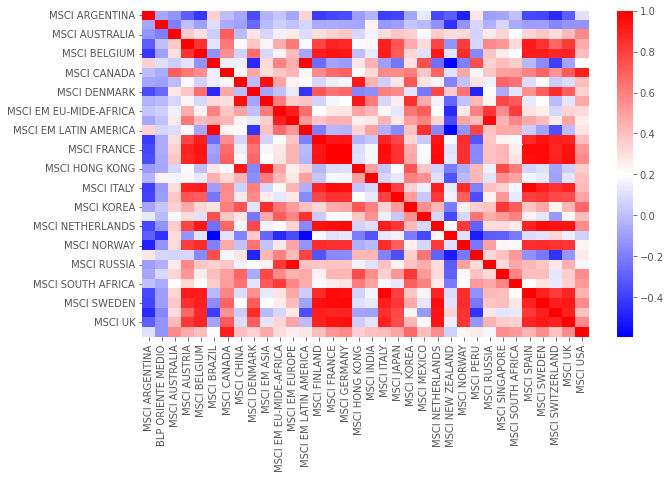

In [ ]:
def plot():
  plt.style.use('ggplot')
  plt.rcParams['figure.figsize'] = 10, 6
  plt.rcParams['axes.facecolor'] = "0.92"
  cmap=LinearSegmentedColormap.from_list('br',["b", "w", "r"], N=256)
  sns.heatmap(logReturns.corr().corr(), cmap = cmap)
  plt.show()
plot()


### Calculate the Euclidean distance matrix for all 35 series

In [ ]:
euclid = np.zeros((35,35))
def euclidean_distance(x, y):
    return np.linalg.norm(x.values-y.values)
for i in range(35):
    for j in range(i+1, 34):
        euclid[i,j] = euclid[j,i] = euclidean_distance(logReturns.iloc[:,i], logReturns.iloc[:,j])

print(euclid)

[[0.         0.95089984 0.90563871 ... 0.89167977 0.85376424 0.        ]
 [0.95089984 0.         0.51493432 ... 0.50007701 0.52148883 0.        ]
 [0.90563871 0.51493432 0.         ... 0.32444197 0.31482655 0.        ]
 ...
 [0.89167977 0.50007701 0.32444197 ... 0.         0.30411319 0.        ]
 [0.85376424 0.52148883 0.31482655 ... 0.30411319 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### Run a k-means cluster on the 35 return series

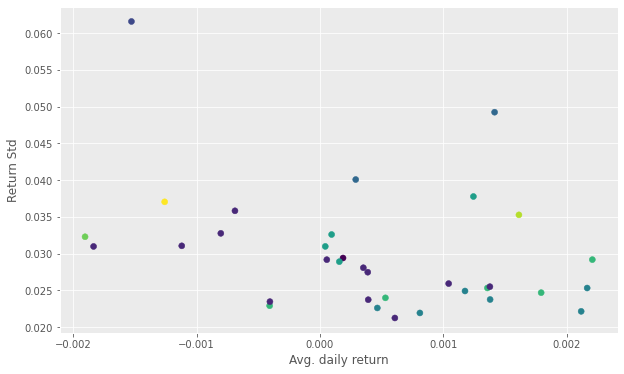

In [ ]:
series_features = logReturns.T
kmeans = KMeans(n_clusters=10)
kmeans.fit(series_features)
X = logReturns.mean()
Y = logReturns.std()

plt.scatter(X, Y, c= kmeans.labels_)
plt.xlabel("Avg. daily return")
plt.ylabel("Return Std")
plt.show()


### Justify your choice of k

In [ ]:
wss = {}
for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(series_features)
    wss[i] = kmeans.inertia_


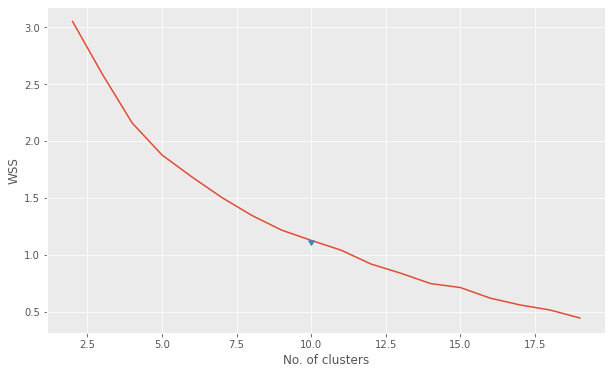

In [ ]:
plt.plot(list(wss.keys()), list(wss.values()))
plt.plot(10, wss[10], marker=11)
plt.xlabel("No. of clusters")
plt.ylabel("WSS")
plt.show()


10 clusters seems like a good trade off between the WSS and number of clusters. Too many clusters would lead to overfitting, whereas too few will lead to an inaccurate model.

### Normalize each data series. Subtract each series by the weighted average from part 2.4.  Then divide this difference by the weighted volatility from part 3.4

In [ ]:
x = logReturns.values
standard_scaler = preprocessing.StandardScaler()
x_scaled = standard_scaler.fit_transform(x)
df_new = pd.DataFrame(x_scaled)

### Using the normalized data series, re-calculate the Euclidean distance matrix for all 35 series

In [ ]:
euclid_new = np.zeros((35,35))
for i in range(35):
    for j in range(i+1, 34):
        euclid_new[i,j] = euclid_new[j,i] = euclidean_distance(df_new.iloc[:,i], df_new.iloc[:,j])
    
euclid_new

array([[ 0.        , 18.65713533, 17.79574501, ..., 17.31013651,
        15.97742461,  0.        ],
       [18.65713533,  0.        , 18.18418918, ..., 17.46244568,
        17.7218315 ,  0.        ],
       [17.79574501, 18.18418918,  0.        , ..., 14.09618022,
        13.01967757,  0.        ],
       ...,
       [17.31013651, 17.46244568, 14.09618022, ...,  0.        ,
        12.33501825,  0.        ],
       [15.97742461, 17.7218315 , 13.01967757, ..., 12.33501825,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

### Using the normalized data series, run a k-means cluster on the 35 transformed variables

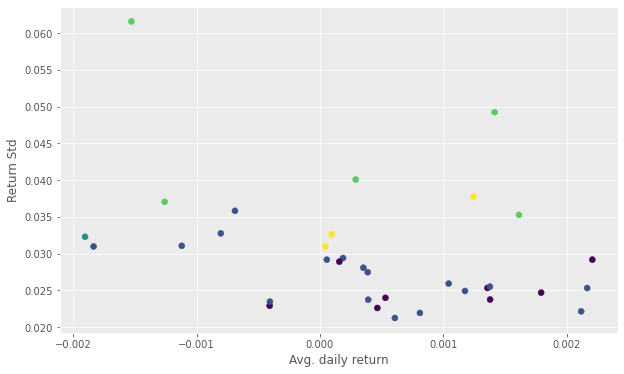

In [ ]:
series_features_new = df_new.T
kmeans_new = KMeans(n_clusters=5)
kmeans_new.fit(series_features_new)

X = logReturns.mean()
Y = logReturns.std()

plt.scatter(X, Y, c= kmeans_new.labels_)
plt.xlabel("Avg. daily return")
plt.ylabel("Return Std")
plt.show()


### Justify your choice of k

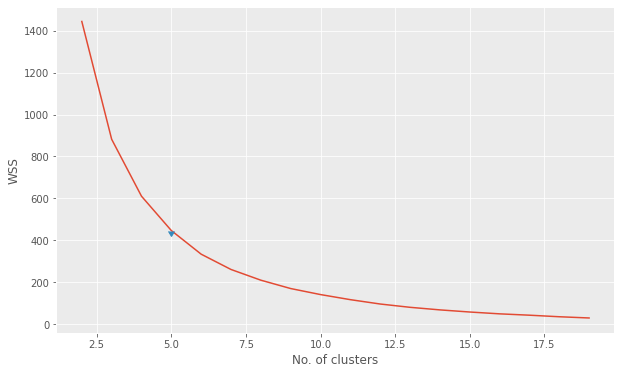

In [ ]:
wss_new = {}
for i in range(2,20):
    kmeans_new = KMeans(n_clusters=i)
    kmeans_new.fit(series_features_new)
    wss_new[i] = kmeans_new.inertia_/(i)

plt.plot(list(wss_new.keys()), list(wss_new.values()))
plt.plot(5, wss_new[5], marker=11)
plt.xlabel("No. of clusters")
plt.ylabel("WSS")
plt.show()

This shows a much better trade off, with 5 clusters being enough to reduce the WSS.

### Were the 2 k values the same?

The standardized data was able to use a lower k-value to show an improved amount of clustering with fewer clusters.

### Did the grouping of the series change as a result of your normalization?

In [ ]:
kmeans_new = KMeans(n_clusters = 5)
kmeans_new.fit(series_features_new)
print(kmeans_new.labels_)
print(kmeans.labels_)

[3 2 0 1 1 3 0 4 1 4 3 3 3 1 1 1 4 3 1 1 4 3 1 0 1 3 3 4 4 1 1 1 1 0]
[ 6  7  5 16 13  1 14  3 17  3  8  8  1 13 13 13  3 10  0 15  4  9 13 12
  2 11  8  4 18  0 13  2  2 14]


We can see that the labels did indeed change and this is obvious from the scatter plot.

### Choose one of the 35 variables to serve as your response variable (e.g. LUXXX).  You may choose the same one that your group used in the previous assignment.

In [ ]:
luxx = dataset['LUXXX']

### The goal is to explain (not predict) the value of your response at time t, given the other 34 variables at time t.  DO NOT USE the response at time T + 1.  

In [ ]:
X = dataset.iloc[:, 1:]

linreg= LinearRegression()
linreg.fit(X, luxx)
linreg.coef_


array([-6.78963165e-02,  3.01817582e-02,  1.30307560e-02,  1.72983030e+00,
        2.35176154e+00, -4.66692641e-01,  3.87152693e-01, -3.92906314e+00,
        3.66339012e-02,  2.14198411e+00,  1.10562391e+00, -1.63739219e+00,
        6.32161834e-01, -7.13861510e-01, -1.58435916e+00,  6.67116958e+00,
       -3.23353094e-02, -4.81720919e-01, -1.41739712e+01,  3.45621150e-01,
       -8.60864584e-01, -2.30265280e-02, -5.75355294e+00,  8.27983013e-01,
       -4.52970517e-03,  8.71589939e-02,  7.07703064e-02,  2.01451702e-01,
       -3.04657632e-01,  8.04377690e+00,  4.73772946e-02, -6.37792863e-01,
        7.36385678e-02, -2.55124505e-03])

### What is the difference between unsupervised learning and supervised learning?

Unsupervised learning does not have any labels or "y" variables. It generates a model/detects a pattern without knowing the correct outputs. This is used to get insights from larger datasets.

Supervised learning does have labels or "y" variables. It uses these labels to train a model and predict labels/outputs for data outside of our training data. Its aim is to extrapolate/estimate the outputs/labels for data it has not seen before.

### Which is clustering?  Which is CART?  Which is SVM?

Clustering is a form of unsupervised learning, where the aim is to seperate our dataset into seperate clusters where the datapoints within clusters are "similar" to each other and datapoints between clusters are "different".

CART (Classification and Regression Trees) is a tree-like, non-parametric, supervised learning model. It is used for both classificiation and regression, whose goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

SVM (Support Vector Machines) are a set of supervised learning models also used for classification and regression. They are particularly useful in larger dimensions.

### What do the CART and SVM have in common?  Be specific as to how they cut the dimensional space

Both models aim to cut the dimesnion space into sectors with the aim of classifying different groups of datapoints. CART does this by linearly creating cuts in the dataspace to seperate the points, whereas SVM's cut may involve hyperplanes and non-linear cuts.

### How do the CART and SVM methodologies differ?

Decision trees can classify datapoints to multiple labels, whereas SVM is a binary classifier used to split the dataset into two classes.

## Classification and Regression Trees (CART)

Perform a **Classification Tree**, where the response is categorical:

whether your return was higher or lower than the previous week.  (Ties can be ignored).  Choose a suitable depth of the tree, basing your result on cross-validation

We use the K-Fold Cross Validation with **k** parameters equal to **5**. By using a ‘for’ loop, we will fit each model using 4 folds for training data and 1 fold for testing data, and then we will call the accuracy_score method from scikit learn to determine the accuracy of the model.

In [ ]:
daily_return = dataset.pct_change(1)
daily_return_copy = daily_return.copy()
daily_return_copy = daily_return_copy.drop(labels='01-Jan-16', axis=0)

# convert all columns of DataFrame
daily_return_copy = daily_return_copy.apply(pd.to_numeric) # convert all columns of DataFrame
daily_return_copy_CT = daily_return_copy
daily_return_copy_CT.head(2)

# daily_return_copy.shape

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
08-Jan-16,-0.071509,-0.048580,-0.069555,-0.059160,-0.084724,-0.057221,-0.081275,-0.046348,-0.081386,-0.044791,...,-0.069017,-0.074967,-0.041213,-0.046524,-0.062106,-0.068266,-0.067051,-0.063629,-0.053014,-0.060430
15-Jan-16,-0.026471,-0.019174,-0.049493,-0.020068,-0.042187,-0.020433,-0.049758,-0.028433,-0.056562,-0.052214,...,-0.051499,-0.041087,-0.112357,-0.044990,-0.037393,-0.036238,-0.033456,-0.017939,-0.017172,-0.023102


In [ ]:
daily_return_copy_CT['LUXXX_']=daily_return_copy_CT['LUXXX'].apply(lambda x: 1 if x > 0 else 0)
daily_return_copy_CT.iloc[:,:36:35] #this enables us to view our transformed categorical LUXXX_ with the original
#LUXXX

,LUXXX,LUXXX_
Date,,
08-Jan-16,-0.071509,0
15-Jan-16,-0.026471,0
22-Jan-16,-0.002322,0
29-Jan-16,0.035141,1
05-Feb-16,-0.018185,0
...,...,...
25-Sep-20,-0.060663,0
02-Oct-20,0.049442,1
09-Oct-20,0.037079,1


In [ ]:
# We can now drop LUXXX so LUXXX_ can be our response variable
daily_return_copy_CT = daily_return_copy_CT.drop(labels='LUXXX', axis=1)
daily_return_copy_CT.head(1)

,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,...,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA,LUXXX_
Date,,,,,,,,,,,,,,,,,,,,,
08-Jan-16,-0.04858,-0.069555,-0.05916,-0.084724,-0.057221,-0.081275,-0.046348,-0.081386,-0.044791,-0.064435,...,-0.074967,-0.041213,-0.046524,-0.062106,-0.068266,-0.067051,-0.063629,-0.053014,-0.06043,0


In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import KFold

In [ ]:
# Validation Set approach : take 80% of the data as the training set and 20 % as the test set. 
# X is a dataframe with  the input variable

X = daily_return_copy_CT.iloc[:,:34]

X.reset_index(inplace=True)
X.drop(labels='Date', axis=1, inplace=True)
X = pd.DataFrame(X)

X.head(1)

,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
0,-0.04858,-0.069555,-0.05916,-0.084724,-0.057221,-0.081275,-0.046348,-0.081386,-0.044791,-0.064435,...,-0.069017,-0.074967,-0.041213,-0.046524,-0.062106,-0.068266,-0.067051,-0.063629,-0.053014,-0.06043


In [ ]:
# # Y is the target or output variable 
y = daily_return_copy_CT.iloc[:,-1:]

y.reset_index(inplace=True)
y.drop(labels='Date', axis=1,inplace=True)
y = pd.DataFrame(y)

y.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,LUXXX_
0,0
1,0


In [ ]:
length_to_split = int(len(X) * 0.8)
# Splitting the X and y into train and test datasets for default model
X_train, X_test = X[:length_to_split], X[length_to_split:]
y_train, y_test = y[:length_to_split], y[length_to_split:]
 
# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
    
clf = tree.DecisionTreeClassifier(random_state=20)

# Create the model on train dataset
model = clf.fit(X_train, y_train)

pred_labels_te = model.predict(X_test)
pred_labels_tr = model.predict(X_train)
 

# Calculate the accuracy
print(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)

(200, 34) (51, 34)
(200, 1) (51, 1)
62.745098039215684


In [ ]:
    # Tree summary and model evaluation metrics
    print('*************** Tree Summary ***************')
    print('Classes: ', clf.classes_)
    print('Tree Depth: ', clf.tree_.max_depth)
    print('No. of leaves: ', clf.tree_.n_leaves)
    print('No. of features: ', clf.n_features_in_)
    print('--------------------------------------------------------')
    print("")

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  10
No. of leaves:  32
No. of features:  34
--------------------------------------------------------



In [ ]:
    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")

*************** Evaluation on Test Data ***************
Accuracy Score:  0.6274509803921569
              precision    recall  f1-score   support

           0       0.59      0.85      0.70        26
           1       0.71      0.40      0.51        25

    accuracy                           0.63        51
   macro avg       0.65      0.62      0.61        51
weighted avg       0.65      0.63      0.61        51

--------------------------------------------------------



In [ ]:
    print('*************** Evaluation on Training Data ***************')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')

*************** Evaluation on Training Data ***************
Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       102

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

--------------------------------------------------------


In [ ]:
# KFold Cross Validation approach
kf = KFold(n_splits=5,shuffle=False)
kf.split(X)    
     
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
accuracy_model = []
 
# Iterate over each train-test split
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model = clf.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)

# Print the accuracy    
print(accuracy_model)

[60.78431372549019, 52.0, 54.0, 72.0, 64.0]


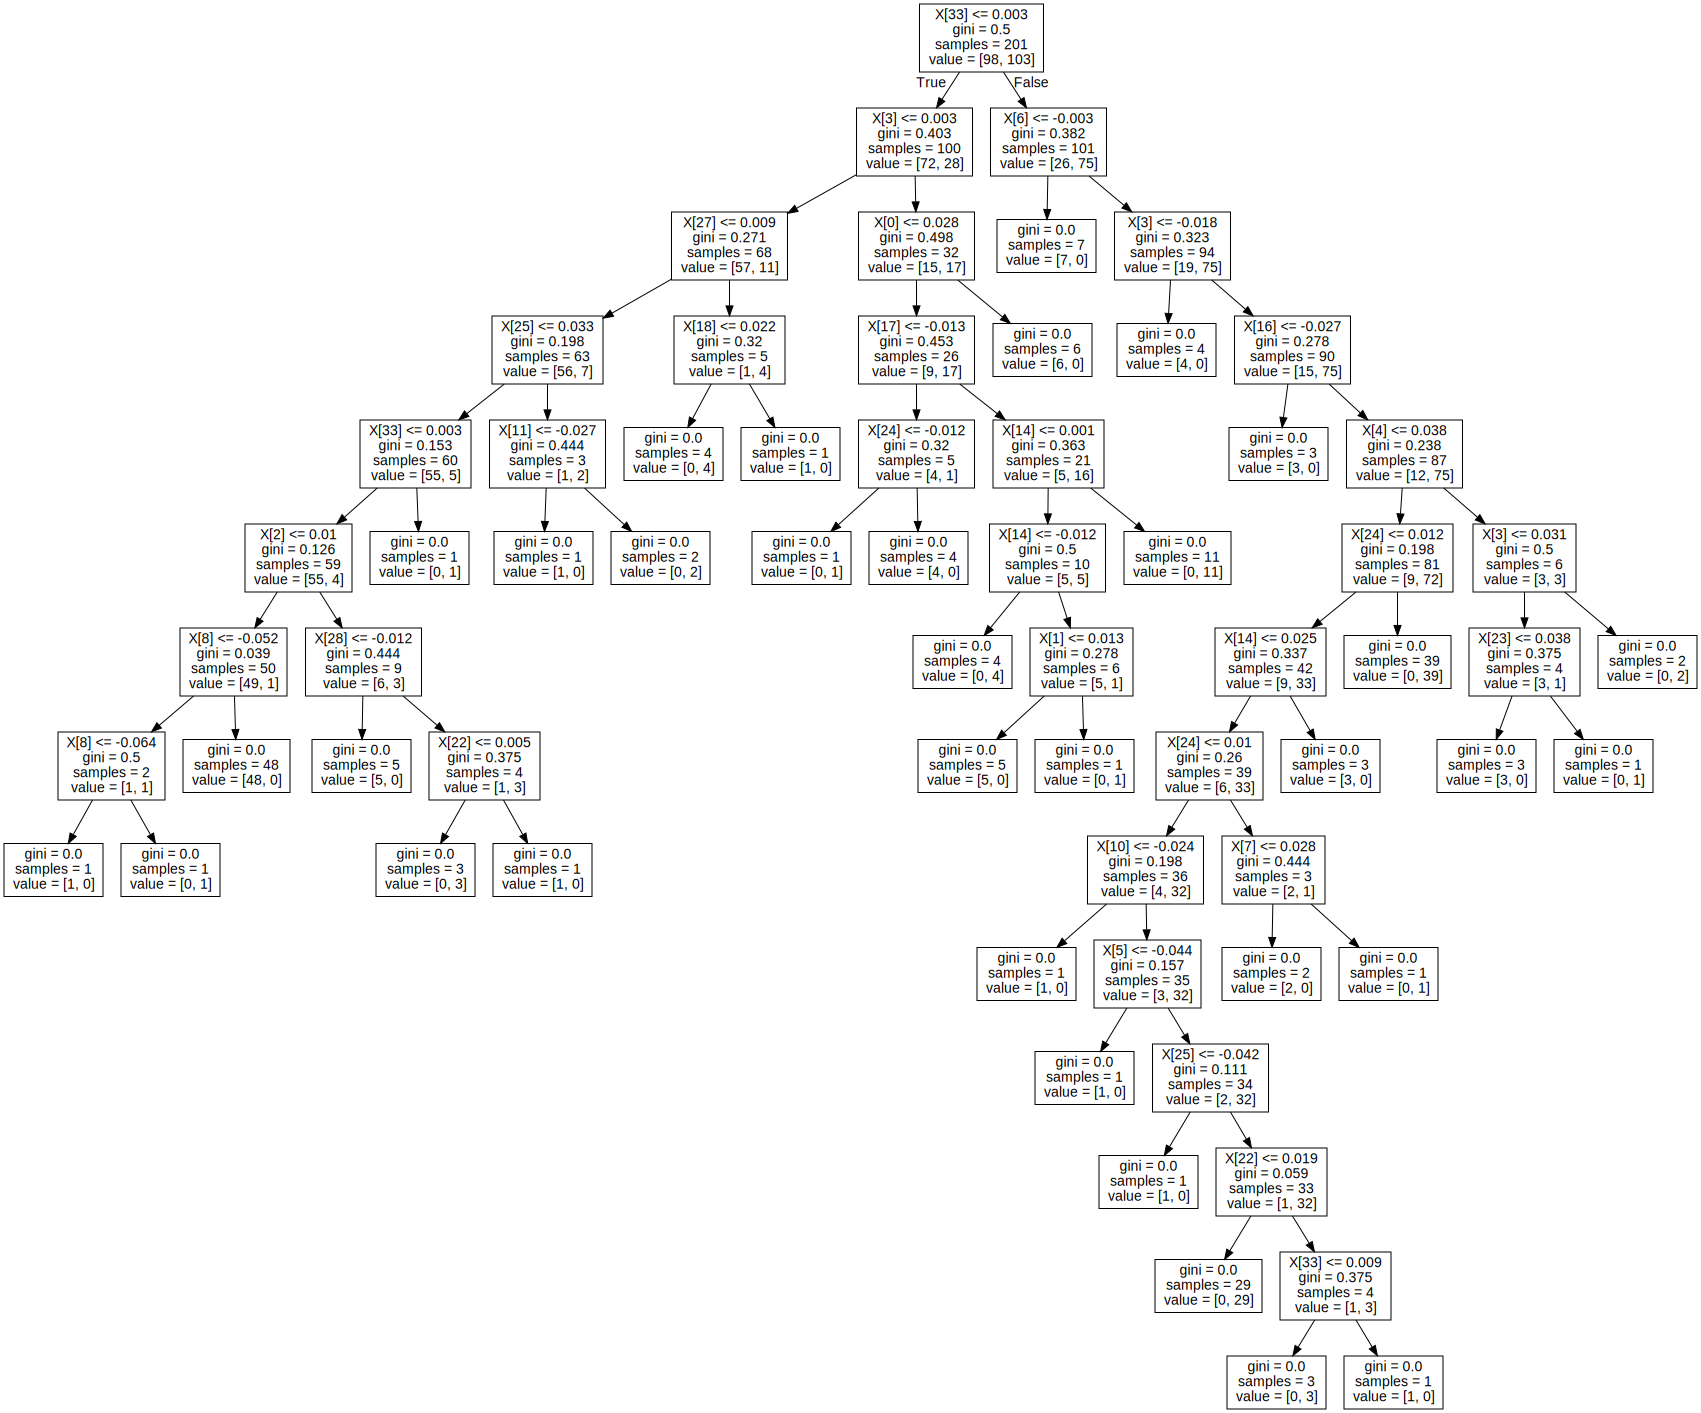

In [ ]:
import graphviz 

dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

From the above, a depth size of 6 is optimal. We run the model again.

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=20, max_depth=6)
 
# Create the model on train dataset
model = clf.fit(X_train, y_train)
pred_labels_te = model.predict(X_test)
pred_labels_tr = model.predict(X_train)
 
# Calculate the accuracy
print(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)

70.0


Using a maximum depth of 6, we get around 70% accuracy which is not far from the maximum we had from our cross validation i.e 72%

It is important to note that we can improve our model by including parameters such as `Entropy`. With a larger dataset, accuracy may also increase.

In [ ]:
    # Tree summary and model evaluation metrics
    print('*************** Tree Summary ***************')
    print('Classes: ', clf.classes_)
    print('Tree Depth: ', clf.tree_.max_depth)
    print('No. of leaves: ', clf.tree_.n_leaves)
    print('No. of features: ', clf.n_features_in_)
    print('--------------------------------------------------------')
    print("")

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  6
No. of leaves:  20
No. of features:  34
--------------------------------------------------------



In [ ]:
    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")

*************** Evaluation on Test Data ***************
Accuracy Score:  0.7
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        26
           1       0.76      0.54      0.63        24

    accuracy                           0.70        50
   macro avg       0.72      0.69      0.69        50
weighted avg       0.71      0.70      0.69        50

--------------------------------------------------------



In [ ]:
    print('*************** Evaluation on Training Data ***************')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')

*************** Evaluation on Training Data ***************
Accuracy Score:  0.9253731343283582
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        98
           1       0.92      0.94      0.93       103

    accuracy                           0.93       201
   macro avg       0.93      0.92      0.93       201
weighted avg       0.93      0.93      0.93       201

--------------------------------------------------------


Our model perfomed quite well on the training data, this is very much expected.

The model does relatively well in predicting when there will be a rise in **LUXXX** return the next week i.e 0.76. But, the performance is a bit above average identifying when there will be a negative return.

Interestingly, the model has a high recall rate i.e. 0.85 in identifying the weeks where there will be negative returns.

Away from our test results, in the training result, the model performed excellently well.

### Perform a **Regression Tree**.  The difference here is the response is continuous.  This value should be the weekly return that you calculated on each series. Choose a suitable depth of the tree, basing your result on cross-validation

We replicate exact model as above and this time with a regressor, then judge its performance.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
daily_return_copy_RT = dataset.pct_change(1).drop(labels='01-Jan-16', axis=0)
daily_return_copy_RT.head(1)

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
08-Jan-16,-0.071509,-0.04858,-0.069555,-0.05916,-0.084724,-0.057221,-0.081275,-0.046348,-0.081386,-0.044791,...,-0.069017,-0.074967,-0.041213,-0.046524,-0.062106,-0.068266,-0.067051,-0.063629,-0.053014,-0.06043


In [ ]:
# Validation Set approach : take 80% of the data as the training set and 20 % as the test set. 
# X is a dataframe with  the input variable

X = daily_return_copy_RT.iloc[:,1:36]

X.reset_index(inplace=True)
X.drop(labels='Date', axis=1, inplace=True)
# X = pd.DataFrame(X)

X.head(1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
0,-0.04858,-0.069555,-0.05916,-0.084724,-0.057221,-0.081275,-0.046348,-0.081386,-0.044791,-0.064435,...,-0.069017,-0.074967,-0.041213,-0.046524,-0.062106,-0.068266,-0.067051,-0.063629,-0.053014,-0.06043


In [ ]:
# # Y is the target or output variable 
y = daily_return_copy_RT.iloc[:,0:1]

y.reset_index(inplace=True)
y.drop(labels='Date', axis=1,inplace=True)
# y = pd.DataFrame(y)

y.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,LUXXX
0,-0.071509
1,-0.026471


In [ ]:
length_to_split = int(len(X) * 0.8)
# Splitting the X and y into train and test datasets for default model
X_train, X_test = X[:length_to_split], X[length_to_split:]
y_train, y_test = y[:length_to_split], y[length_to_split:]
 
# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(200, 34) (51, 34)
(200, 1) (51, 1)


Using feature scaling we will normalize the range of independent variables.

In [ ]:
# using feature scaling
# from sklearn.preprocessing import StandardScaler
# X_sc = StandardScaler()
# X_train = X_sc.fit_transform(X_train)
# # X_test = X_sc.transform(X_test)
# X_train[0]

In [ ]:
regressor  = tree.DecisionTreeRegressor(random_state=20)

# Create the model on train dataset
model = regressor.fit(X_train, y_train)

# predicting the result
# pred_labels_te = model.predict(X_sc.transform(X_test))
pred_labels_te = model.predict(X_test)
pred_labels_tr = model.predict(X_train)

print(cross_val_score(model, X, y, cv=10 ) )
 

 # Accuracy of the algorithm
from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test, pred_labels_te))
# Calculate the accuracy
# print(model.score(model.predict(X_test, y_test)*100))
print(model.score(  X_test,  y_test   ) )

[ 0.0368078  -1.52084295 -0.91669881 -1.60088242 -0.3870793  -0.65812625
  0.16479488  0.09078428 -0.19304896  0.36924785]
0.02562926419692646


Our coefficient of determination $R^2$ is given as $0.02562926419692646 ≈ 2.6\%$.  This is the proportion of the variation in the dependent variable that is predictable from the independent variable(s). Best possible score is 1.0, lower values are worse. Which shows our model is not good.

Furthermore, the cross validation score from the plot shows us that regression is not a good fit for our data.

In [ ]:
top_features = pd.DataFrame( model.feature_importances_, index =  list (model.feature_names_in_ ))

top_features.rename( index=str, columns={0:'Gini Importance'} , inplace=True  )
top_features.sort_values( by= 'Gini Importance' , ascending=False, inplace=True )
top_features.head(10)

,Gini Importance
MSCI AUSTRIA,0.408712
MSCI NETHERLANDS,0.075948
MSCI NORWAY,0.057827
MSCI PERU,0.042765
MSCI BELGIUM,0.042355
MSCI CANADA,0.039286
MSCI AUSTRALIA,0.035663
MSCI KOREA,0.028785
MSCI FINLAND,0.028037
MSCI JAPAN,0.024984


In [ ]:
    # Tree summary and model evaluation metrics
    print('*************** Tree Summary ***************')
    print('Tree Depth: ', clf.tree_.max_depth)
    print('No. of leaves: ', clf.tree_.n_leaves)
    print('No. of features: ', clf.n_features_in_)
    print('--------------------------------------------------------')
    print("")

*************** Tree Summary ***************
Tree Depth:  6
No. of leaves:  20
No. of features:  34
--------------------------------------------------------



In [ ]:
    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    print('--------------------------------------------------------')
    print("")

*************** Evaluation on Test Data ***************
Accuracy Score:  0.02562926419692646
--------------------------------------------------------



In [ ]:
    print('*************** Evaluation on Training Data ***************')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    print('--------------------------------------------------------')

*************** Evaluation on Training Data ***************
Accuracy Score:  1.0
--------------------------------------------------------


For the training test, our model outputs a score of $1.0$, this indicates a likelihood of overfitting.

In [ ]:
# KFold Cross Validation approach
kf = KFold(n_splits=10,shuffle=False)
kf.split(X)    
     
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
coef_of_det_model = []
 
# Iterate over each train-test split
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model2 = regressor.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    coef_of_det_model.append(model2.score( X_test, y_test)*100)

# Print the accuracy    
print(coef_of_det_model)

[3.680779777115961, -152.0842947138774, -91.66988119896797, -160.0882417533624, -38.70793047316039, -65.81262543856417, 16.479488009187914, 9.078428277050431, -19.304896494347233, 36.92478458398624]


From the above, hardcoding the **K-Folds** didn't help us out.

We plot our model to gain some insights.

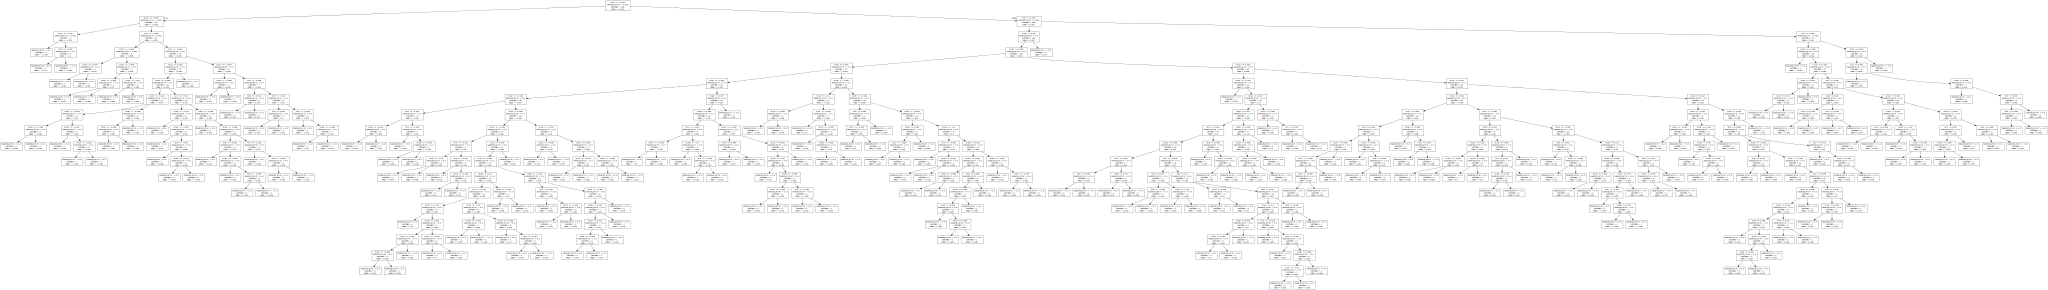

In [ ]:
import graphviz 
dot_data2 = tree.export_graphviz(model2, out_file=None) 
graph2 = graphviz.Source(dot_data2) 
graph2

From the above chart, most of the nodes have squared_error = 0.0, we conclude that regression is very poor on the data we have.

As a result, we conclude that the classification trees perform better.

# Support Vector Machines (SVM)

Instead of running a regression tree, use SVM.  Use the original space of 35 variables

Here, we use Support Vector Regression (SVR), the default kernel Radial Basis Function (RBF) and the Linear kernel as our kernels.

In [ ]:
daily_return_copy_RT = dataset.pct_change(1).drop(labels='01-Jan-16', axis=0)
daily_return_copy_RT.head(1)

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
08-Jan-16,-0.071509,-0.04858,-0.069555,-0.05916,-0.084724,-0.057221,-0.081275,-0.046348,-0.081386,-0.044791,...,-0.069017,-0.074967,-0.041213,-0.046524,-0.062106,-0.068266,-0.067051,-0.063629,-0.053014,-0.06043


In [ ]:
# Validation Set approach : take 80% of the data as the training set and 20 % as the test set. 
# X is a dataframe with  the input variable

X = daily_return_copy_RT.iloc[:,1:36]

X.reset_index(inplace=True)
X.drop(labels='Date', axis=1, inplace=True)
# X = pd.DataFrame(X)

X.head(1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
0,-0.04858,-0.069555,-0.05916,-0.084724,-0.057221,-0.081275,-0.046348,-0.081386,-0.044791,-0.064435,...,-0.069017,-0.074967,-0.041213,-0.046524,-0.062106,-0.068266,-0.067051,-0.063629,-0.053014,-0.06043


In [ ]:
# # Y is the target or output variable 
y = daily_return_copy_RT.iloc[:,0:1]

y.reset_index(inplace=True)
y.drop(labels='Date', axis=1,inplace=True)
# y = pd.DataFrame(y)

y.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,LUXXX
0,-0.071509
1,-0.026471


In [ ]:
length_to_split = int(len(X) * 0.8)
# Splitting the X and y into train and test datasets for default model
X_train, X_test = X[:length_to_split], X[length_to_split:]
y_train, y_test = y[:length_to_split], y[length_to_split:]
 
# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(200, 34) (51, 34)
(200, 1) (51, 1)


Instead of running a regression tree, use SVM.  Use the original space of 35 variables

In [ ]:
from sklearn import svm

regr1 = svm.SVR(kernel='linear')
regr2 = svm.SVR(kernel="rbf")

regr1.fit(X_train, y_train)
regr2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
print(regr1.score(X_test,y_test)*100)
print(regr2.score(X_test,y_test)*100)

-9.740833889653743
-9.740833889653743


The above shows that the regression is very awful for the data. 

Using SVM classification algorithm.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

svmModelPipe = make_pipeline(StandardScaler(), SVC(kernel = 'linear', gamma = 'scale'))

In [ ]:
# Validation Set approach : take 80% of the data as the training set and 20 % as the test set. 
# X is a dataframe with  the input variable

X = daily_return_copy_CT.iloc[:,:34]

X.reset_index(inplace=True)
X.drop(labels='Date', axis=1, inplace=True)
X = pd.DataFrame(X)

X.head(1)


# ------------------------------------

# # Y is the target or output variable 
y = daily_return_copy_CT.iloc[:,-1:]

y.reset_index(inplace=True)
y.drop(labels='Date', axis=1,inplace=True)
y = pd.DataFrame(y)

y.head(2)

# -------------------------------

length_to_split = int(len(X) * 0.8)
# Splitting the X and y into train and test datasets for default model
X_train, X_test = X[:length_to_split], X[length_to_split:]
y_train, y_test = y[:length_to_split], y[length_to_split:]
 
# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(200, 34) (51, 34)
(200, 1) (51, 1)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
model = svmModelPipe.fit(X_train, y_train)
model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [ ]:
pred_labels_te = model.predict(X_test)
pred_labels_tr = model.predict(X_train)

accuracy_score(y_test, model.predict(X_test), normalize=True)

0.803921568627451

In [ ]:
    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")

*************** Evaluation on Test Data ***************
Accuracy Score:  0.803921568627451
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        26
           1       0.83      0.76      0.79        25

    accuracy                           0.80        51
   macro avg       0.81      0.80      0.80        51
weighted avg       0.81      0.80      0.80        51

--------------------------------------------------------



In [ ]:
    print('*************** Evaluation on Training Data ***************')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')

*************** Evaluation on Training Data ***************
Accuracy Score:  0.78
              precision    recall  f1-score   support

           0       0.78      0.77      0.77        98
           1       0.78      0.79      0.79       102

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200

--------------------------------------------------------


Changing the kernel

In [ ]:
svmModelPipe2 = make_pipeline(StandardScaler(), SVC(kernel = 'rbf', gamma = 'scale'))
model2 = svmModelPipe2.fit(X_train, y_train)
pred_labels_te = model2.predict(X_test)
pred_labels_tr = model2.predict(X_train)

accuracy_score(y_test, model2.predict(X_test), normalize=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7058823529411765

This model shows that linear is better than rbf with SVC-linear head and shoulder above SVR (linear and rbf).